**14. Implement a classification/ logistic regression problem.**

# <font color="red"> **Points to Note!!** </font>
# <font color="red"> **1. Use Interactive Plots Wherever Possible!!** </font>
# <font color="red"> **2. While performing train-test split, pass XScaled (standardized/normalized data) as input to the function and not X!!** </font>

In [ ]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_cir

*Sample datasets that may be used for regression:*

        'load_boston'

*Sample datasets that may be used for logistic regression/classification:*

        'load_breast_cancer',
        'load_diabetes',
        'load_digits',
        'load_iris',
        'load_wine'





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import *

##  <font color = 'red'> **Dataset 1: Iris Dataset** </font>

In [ ]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target

# For Binary Classification, let us consider only two classes 0 and 1.

iris_df = iris_df[ (iris_df['target'] == 0) | (iris_df['target'] == 1) ]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


## **STEP 0: DATA EXPLORATION**

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<ipython-input-36-fa7e915f8e38>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  iris_df.hist(ax=ax, layout=(1,5), alpha=0.5);


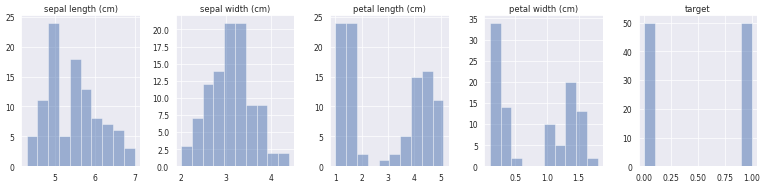

In [ ]:
fig, ax = plt.subplots(figsize=(19,4), dpi=50);
iris_df.hist(ax=ax, layout=(1,5), alpha=0.5);

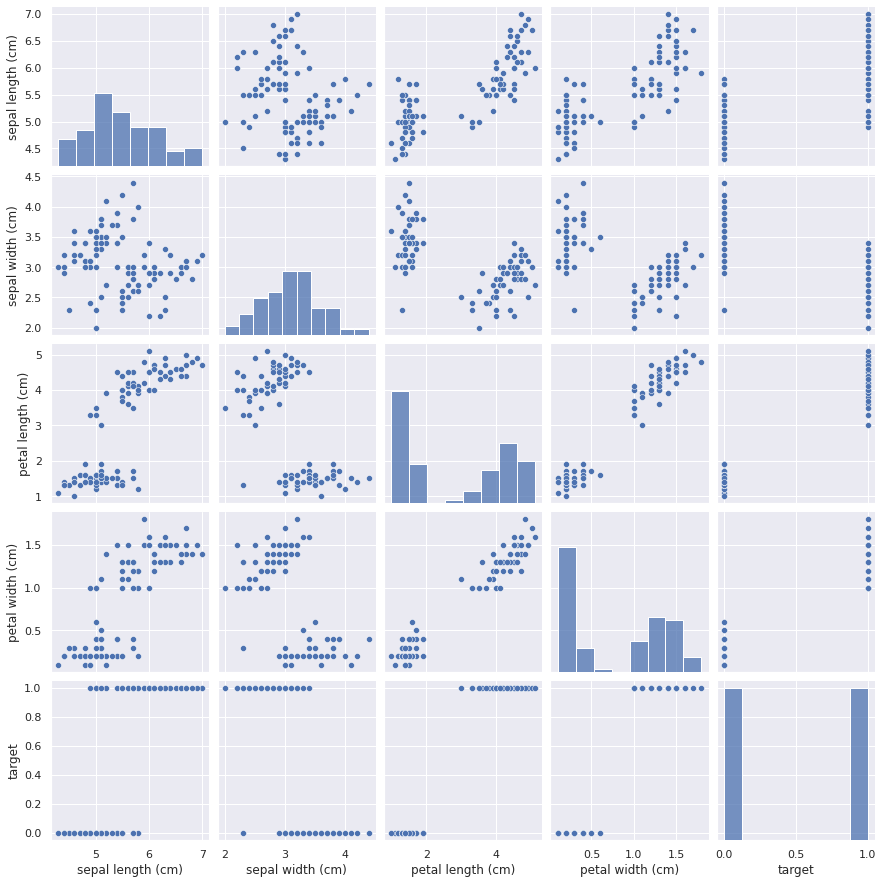

In [ ]:
sns.pairplot(iris_df)

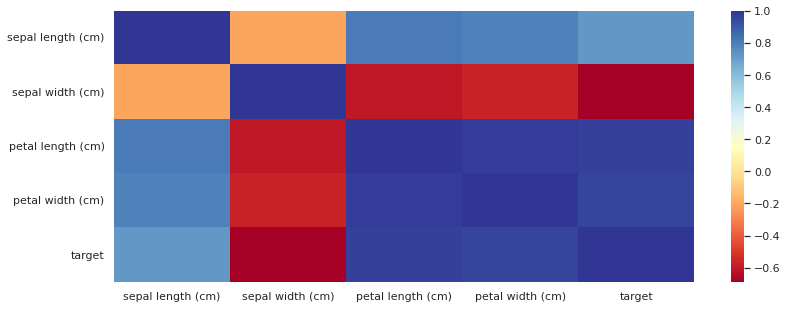

In [ ]:
sns.heatmap(iris_df.corr(), cmap='RdYlBu')

## **STEP 1: PRE-PROCESSING**
REMOVING NULL-VALUES AND OUTLIERS

**1. Determing null values**

In [ ]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

**2. Determining Outliers**

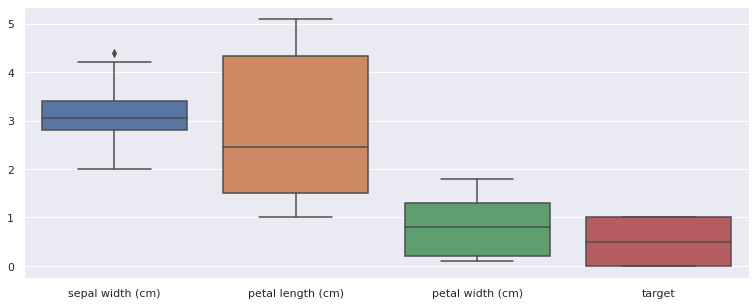

In [ ]:
sns.set(rc={'figure.figsize':(13,5)})
sns.boxplot(data=iris_df.iloc[:,1:])

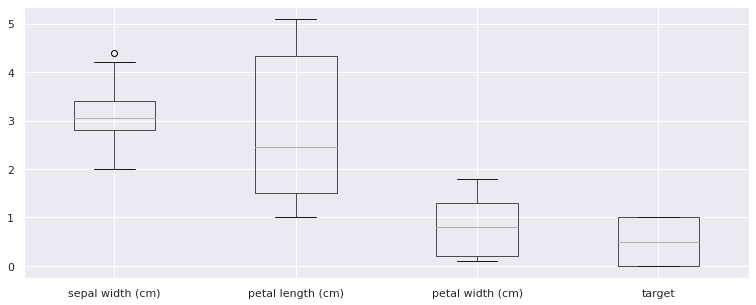

In [ ]:
iris_df.iloc[:,1:].boxplot(figsize=(13,5))

## **STEP 2: TRAIN-TEST SPLIT and Feature Scaling (Part of Pre-processing)**

In [ ]:
features =  ['petal length (cm)',	'petal width (cm)']
X = iris_df[features].values
Y = iris_df['target'].values

**FEATURE SCALING/ Standardization/ Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize(X):
        print("Mean and Standard Deviation Before")
        print(X.mean(axis=0), X.std(axis=0))

        #**********************************************
        ##### Standardize X part [feature wise scaling!!!!!]
        ##### and ensure that resultant data has mean around 0 and standard deviation 1 !!!
        sc=StandardScaler()
        XScaled = sc.fit_transform(X)
        #**********************************************

        print("Mean and Standard Deviation After")
        print(XScaled.mean(axis=0).round(4), XScaled.std(axis=0))
        return XScaled

XScaled = normalize(X)

Mean and Standard Deviation Before
[2.861 0.786] [1.44228257 0.56232019]
Mean and Standard Deviation After
[-0.  0.] [1. 1.]


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

def splitTrainTest(X, Y, seed):
        #***************************************************************
        ######### SPLIT THE """"""XScaled""""""" AND """"""" Y """"""" into trainining and test partitions with 80%-20%split
        #<Fix a random state so that same partition is generated everytime>
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
        #****************************************************************
        print("Dimensions of Original Data:")
        print("Size(X):", X.shape, "; Size(Y)", Y.shape)
        print("Dimensions of Training Data:")
        print("Size(X_train):", X_train.shape, "; Size(Y_train)", Y_train.shape)
        print("Dimensions of Test Data:")
        print("Size(X_test):", X_test.shape, "; Size(Y_test)", Y_test.shape)
        return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = splitTrainTest(XScaled, Y, seed=2)

Dimensions of Original Data:
Size(X): (100, 2) ; Size(Y) (100,)
Dimensions of Training Data:
Size(X_train): (80, 2) ; Size(Y_train) (80,)
Dimensions of Test Data:
Size(X_test): (20, 2) ; Size(Y_test) (20,)


## **STEP 3: FITTING LOGISTIC REGRESSION MODEL ON TRAINING DATA**

### <font color='red'>**3.1 BI-VARIABLE LINEAR REGRESSION**</font>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Petal Width')

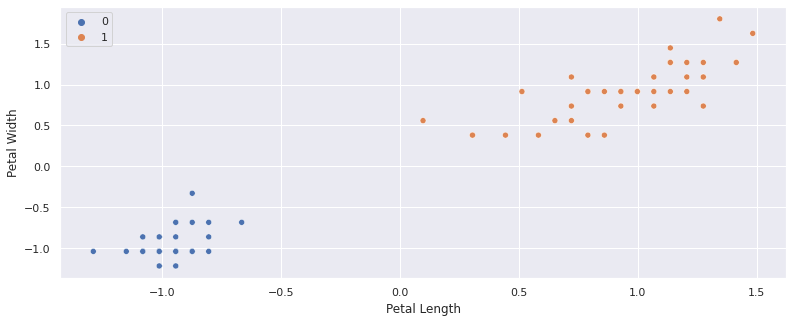

In [ ]:
X = X_train
Y = Y_train
sns.scatterplot(X[:,0], X[:,1], hue=Y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

### <font color='blue'> **GRADIENT DESCENT METHOD FOR LOGISTIC REGRESSION** </font>

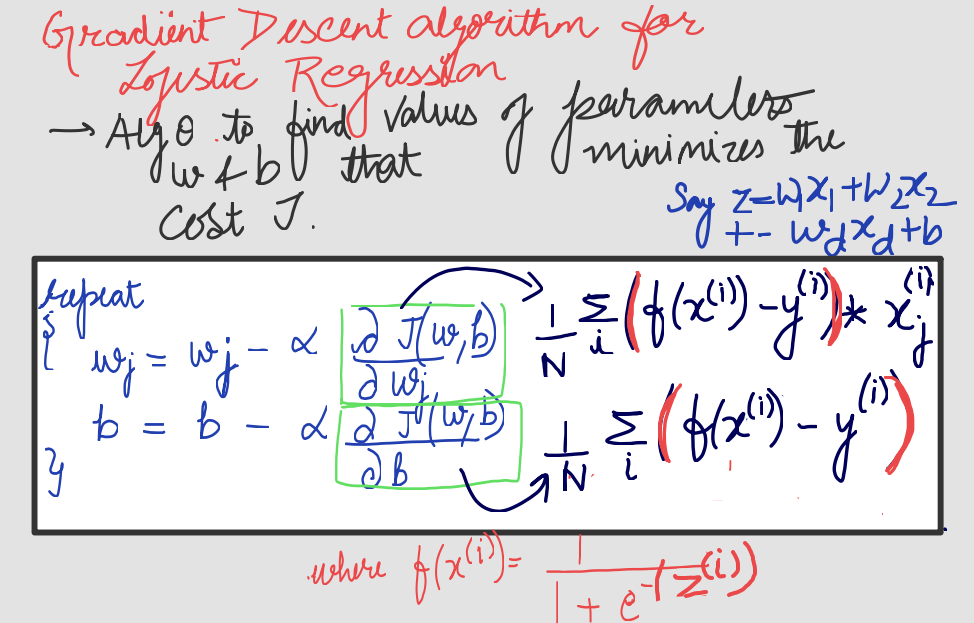

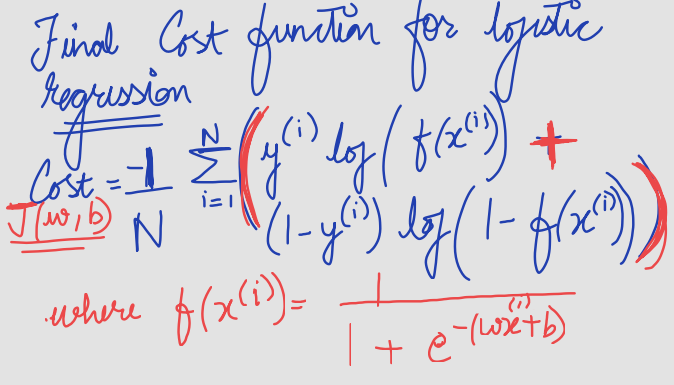

In [ ]:

def sigmoid(z):
    return #######################**** TO DO ****##########################

def computeCost(X, Y, b, w1, w2):
    #### Compute cost J
    N=X.shape[0]
    z = w1*X[:,0] + w2*X[:,1] + b
    f_x = sigmoid(z)
    lossL =  #######################**** TO DO ****##########################
    costJ = (-1/N) * np.sum( lossL )
    return costJ

def gradientDescent (X, Y, learningRate, numIterations):
    N, d = X.shape
    b, w1, w2 = 1,1,1
    errorList =[] ### Store cost in each iteration
    for i in range(numIterations):

        z = w1*X[:,0] + w2*X[:,1] + b
        f_x = sigmoid(z)  #COMPUTE f(X)

        ### compute updated w's and b ##################3

        deltaJb = #######################**** TO DO ****##########################
        deltaJw1 = #######################**** TO DO ****##########################
        deltaJw2 = #######################**** TO DO ****##########################

        #Updating bias
        b = b - #######################**** TO DO ****##########################
        #Updating weights
        w1 = w1 - #######################**** TO DO ****##########################
        w2 = w2 - #######################**** TO DO ****##########################

        costJ = computeCost(X, Y, b, w1, w2)
        errorList.append(costJ)
        # Plot iteration vs error
    plt.plot(range(numIterations), errorList)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()
    return b, w1, w2

**Case 1: Using very low learning rate, say alpha=0.0001**

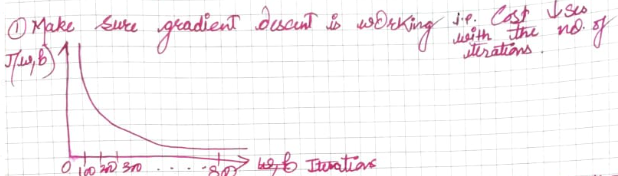

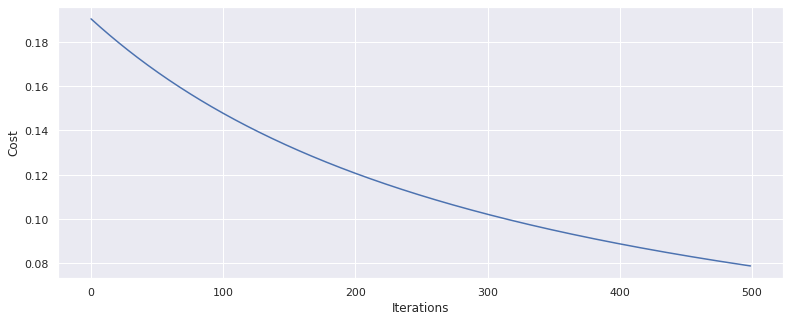

In [ ]:
b, w1, w2 = gradientDescent(X, Y, 0.01, numIterations=500)
# Match w and b against the ones obtained in A and B part

**Case 2: Using very high learning rate, say alpha=0.1**

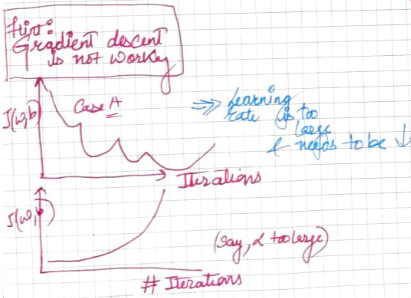

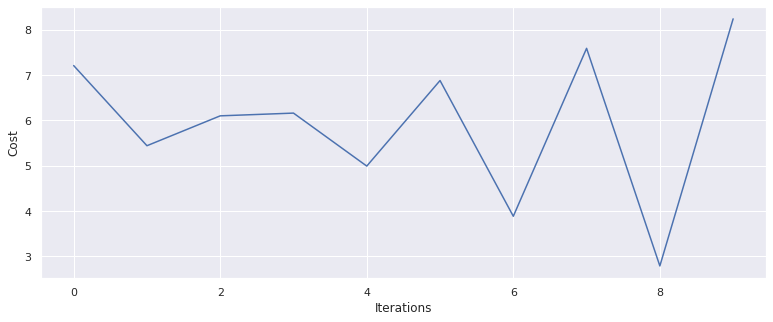

In [ ]:
b, w1, w2 = gradientDescent(X, Y, 1.2, numIterations=10)

### <font color='blue'> **Plotting Decision Boundary** </font>

In [ ]:
def plotDecisionBoundary(X_train, Y_train, w1, w2, b):
        plt.plot(X_train[Y_train==0,0], X_train[Y_train==0,1], 'bo')
        plt.plot(X_train[Y_train==1,0], X_train[Y_train==1,1], 'r*')
        x=np.arange(-3,3,0.2)
        y=-(w1*x + b)/w2    #set w1.x1+w2.x2+b = 0 or w1.x+w2.y+b = 0
        plt.plot(x,y,'g-')
plotDecisionBoundary(X_train, Y_train, w1, w2, b)

## **STEP 4:Evaluating Performance of Model**

In [ ]:
def evaluatePerformance(X, Y, b, w1, w2):
    z = w1*X[:,0] + w2*X[:,1] + b
    f_x = sigmoid(z)
    Y_pred = np.where(f_x > 0.5, 1, 0)
    acc = np.mean(Y_pred == Y)
    return acc * 100
testAccuracy = evaluatePerformance(X_test, Y_test, b, w1, w2)
print("Test Accuracy", testAccuracy)
trainAccuracy = evaluatePerformance(X_train, Y_train, b, w1, w2)
print("Train Accuracy", trainAccuracy)


#<font color='red'>**COMPLETE PROGRAM**</font>

### <font color='red'>**LOGISTIC REGRESSION USING OUR OWN IMPLEMENTATION OF LOGISTIC REGRESSION**</font>

*************Normalization/Standardization*************
Mean and Standard Deviation Before
[5.471 3.099] [0.63848179 0.47633916]
Mean and Standard Deviation After
[-0. -0.] [1. 1.]
*************Train-Test Split*************
Dimensions of Original Data:
Size(X): (100, 2) ; Size(Y) (100,)
Dimensions of Training Data:
Size(X_train): (80, 2) ; Size(Y_train) (80,)
Dimensions of Test Data:
Size(X_test): (20, 2) ; Size(Y_test) (20,)
*************Learning/Fitting the model on training partition*************


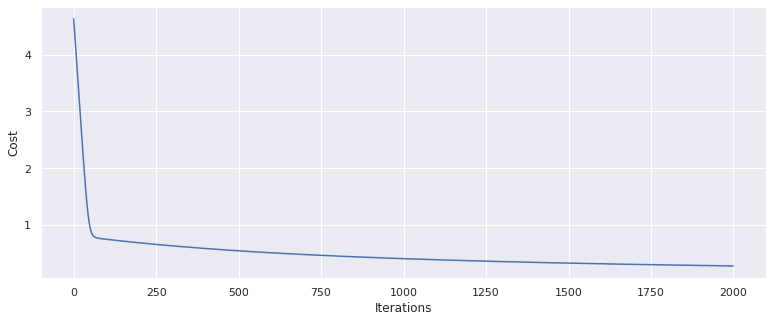


 Parameters Learned: (b, w1, w2) (0.5063278220440764, 1.2000688010246063, -2.2596925159330907) 

*************Plotting decision boundary*************


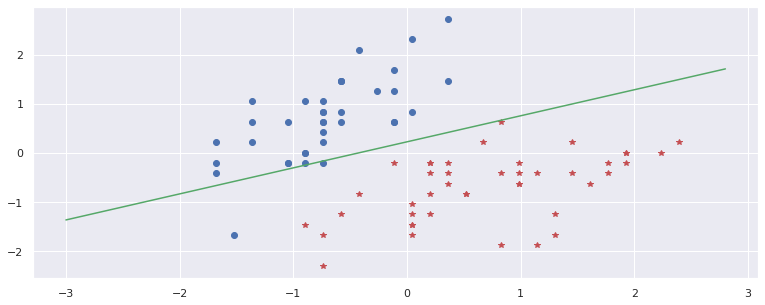

*************Evaluating performance of trained model on test partition*************
Test Accuracy 100.0
Train Accuracy 97.5


In [ ]:
#Choose any of the following two feature sets
features =  ['sepal length (cm)',	'sepal width (cm)']
#>>>>>>>>>>>>>>>>>>>>>>>>>> OR <<<<<<<<<<<<<<<<<<<<<<<
features =  ['petal length (cm)',	'petal width (cm)']
X = iris_df[features].values
Y = iris_df['target'].values

print("*************Normalization/Standardization*************")
XScaled = normalize(X)

print("*************Train-Test Split*************")
X_train, X_test, Y_train, Y_test = splitTrainTest(XScaled, Y, seed=2)

print("*************Learning/Fitting the model on training partition*************")
b, w1, w2 = gradientDescent(X, Y, 0.009, numIterations=2000)

print("\n Parameters Learned: (b, w1, w2)", (b, w1, w2),"\n")

print("*************Plotting decision boundary*************")
plotDecisionBoundary(X_train, Y_train, w1, w2, b)
plt.show()

print("*************Evaluating performance of trained model on test partition*************")
testAccuracy = evaluatePerformance(X_test, Y_test, b, w1, w2)
print("Test Accuracy", testAccuracy)
trainAccuracy = evaluatePerformance(X_train, Y_train, b, w1, w2)
print("Train Accuracy", trainAccuracy)

### <font color='red'>**LOGISTIC REGRESSION USING PRE-DEFINED LogisticRegression Class**</font>

In [ ]:
import numpy
intArray =numpy.array([[34,43,73],[82,22,12],[53,94,66]])

*************Normalization/Standardization*************
Mean and Standard Deviation Before
[5.471 3.099] [0.63848179 0.47633916]
Mean and Standard Deviation After
[-0. -0.] [1. 1.]
*************Train-Test Split*************
Dimensions of Original Data:
Size(X): (100, 2) ; Size(Y) (100,)
Dimensions of Training Data:
Size(X_train): (80, 2) ; Size(Y_train) (80,)
Dimensions of Test Data:
Size(X_test): (20, 2) ; Size(Y_test) (20,)
*************Learning/Fitting the model on training partition*************

 Parameters Learned: (b, w1, w2) (0.32944689590740583, 2.5341947768536066, -2.088987756779937) 

*************Plotting decision boundary*************


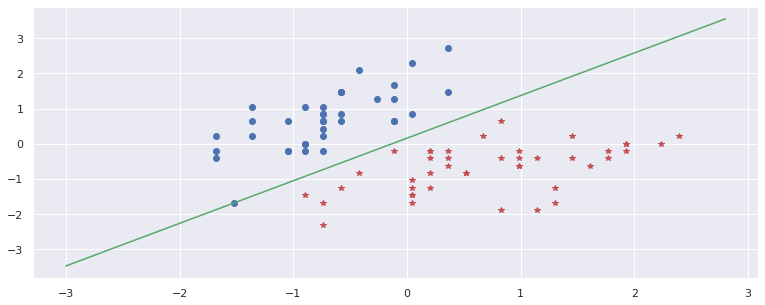

*************Evaluating performance of trained model on test partition*************
Test Accuracy 100.0
Train Accuracy 100.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#Choose any of the following two feature sets
features =  ['sepal length (cm)',	'sepal width (cm)']
#>>>>>>>>>>>>>>>>>>>>>>>>>> OR <<<<<<<<<<<<<<<<<<<<<<<
features =  ['petal length (cm)',	'petal width (cm)']
X = iris_df[features].values
Y = iris_df['target'].values
print("*************Normalization/Standardization*************")
XScaled = normalize(X)
print("*************Train-Test Split*************")
X_train, X_test, Y_train, Y_test = splitTrainTest(XScaled, Y, seed=2)
print("*************Learning/Fitting the model on training partition*************")
LRModel = LogisticRegression()
LRModel.fit(X_train, Y_train)
w1,w2= LRModel.coef_[0]
b=LRModel.intercept_[0]
print("\n Parameters Learned: (b, w1, w2)", (b, w1, w2),"\n")
print("*************Plotting decision boundary*************")
plotDecisionBoundary(X_train, Y_train, w1, w2, b)
plt.show()
print("*************Evaluating performance of trained model on test partition*************")
Y_testPred = LRModel.predict(X_test)
testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
print("Test Accuracy", testAccuracy*100)
Y_trainPred = LRModel.predict(X_train)
trainAccuracy = metrics.accuracy_score(Y_train, Y_trainPred)
print("Train Accuracy", trainAccuracy*100)

In [ ]:
import seaborn
help(seaborn.get_dataset_names)

Help on function get_dataset_names in module seaborn.utils:

get_dataset_names()
    Report available example datasets, useful for reporting issues.
    
    Requires an internet connection.



In [ ]:
seaborn.load_dataset('penguins').tail(150)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
194,Chinstrap,Dream,50.9,19.1,196.0,3550.0,Male
195,Chinstrap,Dream,45.5,17.0,196.0,3500.0,Female
196,Chinstrap,Dream,50.9,17.9,196.0,3675.0,Female
197,Chinstrap,Dream,50.8,18.5,201.0,4450.0,Male
198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
df = seaborn.load_dataset('mpg')

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
from sklearn import datasets